<div class="alert alert-info alert-warning" style="background-color: white; color: black; text-align: center;">
    <h1><span style="color: blue;">Ozan MÖHÜRCÜ</span></h1>
    <h1><span style="color: blue;">Data Analyst | Data Scientist</span></h1>

👋 Hello! I am Ozan, a data analyst who is open to learning and who improves myself in analytical thinking and producing data-driven solutions. I have successfully completed my analyst training and am currently focusing on data science and increasing my competencies in this field.

📊 What Do I Know?

I can extract meaningful results from data by working with Python, SQL and data visualization tools.
I am constantly improving myself in statistical analysis and reporting.
I aim to solve problems and support decision processes with the insights I obtain.

📚 What Am I Doing Right Now?
In my data science training, I am gaining knowledge on topics such as machine learning and big data analytics. In addition, I am looking for opportunities to put my theoretical knowledge into practice by gaining experience in real-world projects.

🎯 My Goal:
To contribute to the growth goals of companies by using my talents in data analysis and data science in a way that will create value in the business world. I am here to learn new information and to constantly improve by sharing my experiences.

If you would like to discuss projects, collaborate or share experiences, I would be happy to connect!
</p>
</div>

<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
</div>

<h1 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'blue'; text-align: center; border-radius: 100px 100px;"> Libraries and Utilities </h1>

In [1]:
import os
import pandas as pd
import tqdm as tqdm
from scipy import stats
import numpy as np
import string

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
# loading dataset
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

df.head(5)  #.style.set_properties(**{'background-color':'white',
                                     #'color': 'black'})


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h1 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'blue'; text-align: center; border-radius: 100px 100px;"> 1. Missing Value Handling</h1>

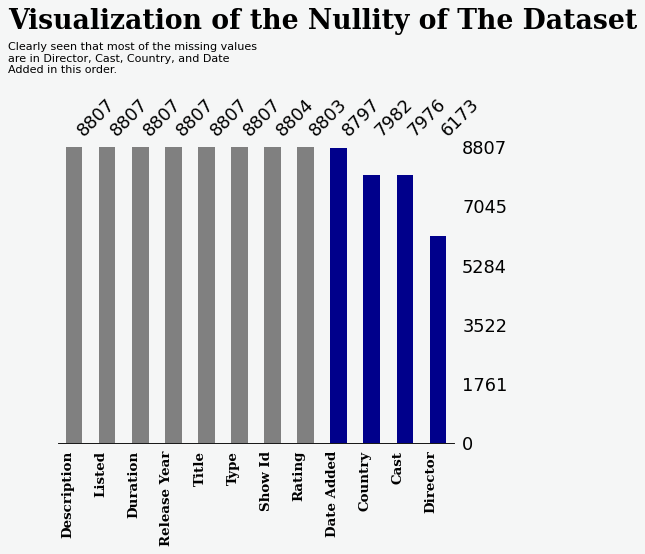

In [3]:
fig, ax = plt.subplots(dpi=80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# Dataframe'in sıralanmış sütunlarına göre renkler belirleniyor
color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', '#00008B', '#00008B', '#00008B', '#00008B']

# msno.bar fonksiyonu ile eksik verileri görselleştiriyoruz
msno.bar(df, fontsize=16, color=color, sort='descending', ax=ax, figsize=(12, 6))

# X-tick etiketlerini özelleştirelim
labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
ax.set_xticklabels(labels, fontdict={'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 12}, rotation=90)

# Ek açıklama ve başlık ekleyelim
ax.text(-2, 1.4, 'Visualization of the Nullity of The Dataset', {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 24})
ax.text(-2, 1.25, 'Clearly seen that most of the missing values \nare in Director, Cast, Country, and Date \nAdded in this order.')

# Y ekseninde etiketleri gizleyelim
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()


<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>Our missing number plots shows that total four columns have missing values which are director,rating, cast, country, date_added. Most of missing values canbe observed in director column, followed by cast column.

Strategy to fill this null values is a crutial step in building better ml models. Generally ml practitioners use range of techniques to solve this issue few are given below. Here null values in **director, cast, country,rating, data_added**

> Three techniques to handle null values
* .dropna() - This is a technique to drop the null values from dataset. This is quite useful if missing values are either quite less or we have ample of data.
* .fillna() - This is a technique used to fillna value with either custom value or values from data stats. Filling techinque involves in filling na with mode of the column, filling forward value, filling backward value, or any custom value.
*  Third technique is quite advanced one, Where we make some assumption about missing values and use conditional statements to predict and fill the missing values from other feathers.


filling missing data with following datapoints

1. director - NoDataAvailable
2. cast - NoDataAvailable
3. county - mode of the county series
4. date_added - mode of the date_added
5. rating - mode of the rating</p>
</div>


  

In [4]:
df_orig = df.copy() # copying original dataset 

# handling missing values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


Successfully handled all the missing values!

<a id = 'section4'></a>

###  <a id = 'section5'> </a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 2. Netflix Content Analysis</h2>

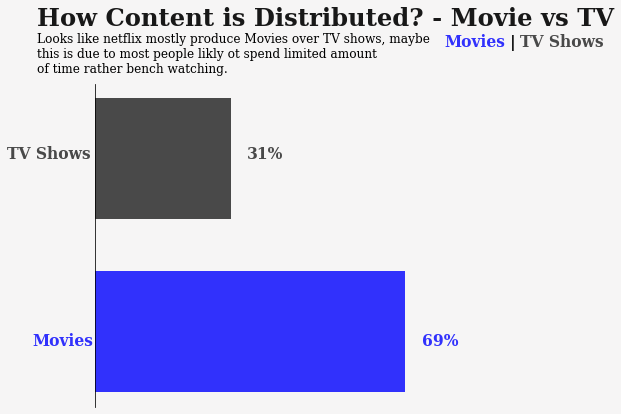

In [5]:
x = df['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize=(6,6), dpi=70)
ax.barh([1], x.values[1], height=0.7, color='black', alpha=0.7)
plt.text(-1750, 1, 'TV Shows', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': 'black'}, alpha=0.7)
plt.text(3000, 1, '31%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'black'}, alpha=0.7)

ax.barh([0], x.values[0], height=0.7, color='#0000FF', alpha=0.8)
plt.text(-1250, -0.08, 'Movies', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#0000FF'}, alpha=0.8)
plt.text(6450, -0.08, '69%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#0000FF'}, alpha=0.8)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'How Content is Distributed? - Movie vs TV', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'}, alpha=0.9)
plt.text(6900, 1.65, 'Movies', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#0000FF'}, alpha=0.8)
plt.text(8200, 1.65, '|', {'color': 'black', 'size': '16', 'weight': 'bold'}, alpha=0.9)
plt.text(8400, 1.65, 'TV Shows', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'black'}, alpha=0.7)

plt.text(-1150, 1.5, 'Looks like netflix mostly produce Movies over TV shows, maybe \nthis is due to most people likly ot spend limited amount \nof time rather bench watching.', 
        {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>Neflix offer two kinds of streaming content, whicha are movies and Tv shows. Distribution of the content on platform is skewed towards to movies, which occupy nearly 70 percent of the content it offer. Our distribution pie shows the stats of content from the data. So, this feature is important while anlysis other features.</p>
</div>

<a id = 'section6'></a>

###  <a id = 'section5'> </a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;">  3. Netflix Rating Analysis</h2>


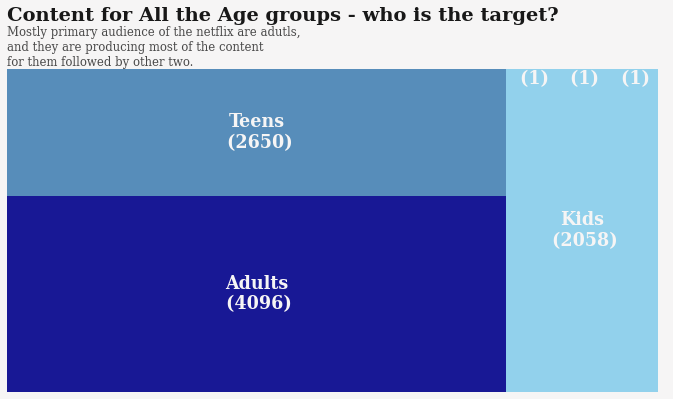

In [6]:
import squarify

rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 

#creating a new column with age rating
df['age_rating'] = df['rating'].replace(to_replace = rating)

age_ratings = df['age_rating'].value_counts()

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


squarify.plot(sizes= age_ratings.values, label = labels,
              color = ['#00008B', '#4682B4','#87CEEB'],
              ax = ax, text_kwargs = {'font':'serif', 'fontsize':'18', 'color': '#f6f5f5', 'weight':'bold'},
              alpha = 0.9)

ax.text(0,114.8, 'Content for All the Age groups - who is the target?',{'font':'serif', 'fontsize':'20', 'color':'black','weight':'bold'}, alpha =0.9)
ax.text(0,101, 'Mostly primary audience of the netflix are adutls, \nand they are producing most of the content \nfor them followed by other two.', {'font':'serif', 'fontsize':'12', 'color':'black','weight':'normal'},alpha = 0.7)

ax.axis('off')
fig.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>From the treemap visulaization, it is clear that most of the netflix content is for adults followed by teens and kids. In general this making sense as well, so lets focus on rating distribution entirely this time, to see understand deeply which sub categories are on top of the list and which are at the bottom of the list.  
> Trying to implement less ink to chart area ratio principal here
    </p>
</div>
    

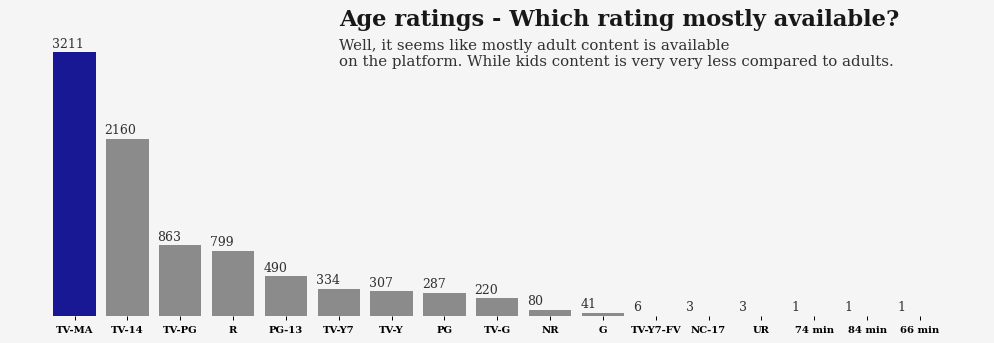

In [7]:
fig, ax = plt.subplots(figsize = (14,4), dpi = 90)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

a = df['rating'].value_counts()
colors = ['#00008B','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']
ax.bar(x = a.index, height = a.values, color = colors, alpha = 0.9)

# Create labels
label = a.values.tolist()

# Text on the top of each bar
for i in range(len(label)):
    x = i  - 0.35
    y = (i+18)/2 + label[i]
    x = x-0.08
    y = y + 52
    ax.text(x,y, '{}'.format(a.values[i]),{'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha = 0.8)

# Title and description text
ax.text(5, 3540, 'Age ratings - Which rating mostly available?', {'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'}, alpha = 0.9)
ax.text(5, 3050, 'Well, it seems like mostly adult content is available \non the platform. While kids content is very very less compared to adults.', {'font': 'serif', 'color': 'black', 'fontsize': 12,}, alpha = 0.8)

# Hide spines
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

# Set xticklabels correctly
ax.set_xticklabels(a.index, fontname='serif', color='black', fontsize=8, weight='bold')

# Hide y-axis
ax.axes.get_yaxis().set_visible(False)

# Show plot
fig.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>From rating count bar chart, it is clear that most of the content is produced for adults and teens. Very less general content is available online on netflix.
   </p>
</div>



<a id = 'section7'></a>


<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'blue'; text-align: center; border-radius: 100px 100px;"> 4. Netflix Time Series Analysis</h2>

In [8]:
# converting the pandas dataframe to datatime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_month_name'] = df['date_added'].dt.month_name()


# creating a series of time data

add_year = df['added_year'].value_counts()
release = df['release_year'].value_counts()

# creating a dataframe

add_df = pd.DataFrame({'year': add_year.index, 'added_year': add_year.values})
release_df = pd.DataFrame({'year': release.index, 'release_year': release.values})

year_df = pd.merge(add_df, release_df, how = 'right', on = 'year')
year_df.fillna('0', inplace = True)
year_df['added_year'] = year_df.added_year.astype('int')

year_df = year_df.sort_values('year', ascending = False).reset_index(drop = True)


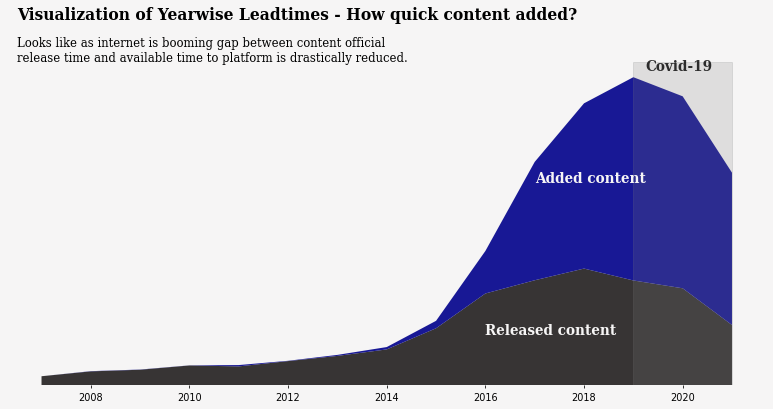

In [9]:
## visulaization

fig, ax = plt.subplots(figsize = (14,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'Released content', 'Added content ']

# stackplot
ax.stackplot(year_df.year[0:15], year_df.release_year[0:15],year_df.added_year[0:15],labels =labels, 
              colors = ['#221f1f','#00008B',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019.25, 3100, 'Covid-19', {'font':'serif', 'fontsize': '14', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2017, 2000, '{}'.format(labels[1]), {'font':'serif', 'fontsize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2016, 500, '{}'.format(labels[0]),{'font':'serif', 'fontsize':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
ax.text(2006.5, 3600, 'Visualization of Yearwise Leadtimes - How quick content added?', 
                      {'font':'serif', 'fontsize':'16', 'weight': 'bold','color': 'black'})
ax.text(2006.5, 3190, 'Looks like as internet is booming gap between content official \nrelease time and available time to platform is drastically reduced. ',
                      {'font':'serif', 'fontsize':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>Data tells a better story, isn't it? looking at the above plots it is obvious that since last decade, content addition to netflix is far higher than released. This is may be because streaming platforms are adding old content as well in parallel to current production. This Trend is true since the boon of internet era as mosty of the content reach one or other steaming platform. From our plot, impact of recent covid-19 pandemic on content release and content addtion can be observed, which is from end 2019 to 2021. Highest number of movies and shows were added around 2020 and lowest of lowest could be seen at the tail section.
    
   </p>
</div>


<a id = 'section8'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue; color : 'black'; text-align: center; border-radius: 100px 100px;"> 5. Netflix Content Release Year Analysis</h2>

In [10]:
TV = df[df['type'] == 'TV Show'].release_year.value_counts()
Movie = df[df['type'] == 'Movie'].release_year.value_counts()

# creating a dataframe

Tv_df = pd.DataFrame({'year': TV.index, 'Tv_count': TV.values})
Movie_df = pd.DataFrame({'year': Movie.index, 'Movie_count': Movie.values})

rel_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
rel_data.fillna('0', inplace = True)
rel_data['Tv_count'] = rel_data.Tv_count.astype('int64')
rel_data = rel_data.sort_values('year', ascending = False).reset_index(drop = True)


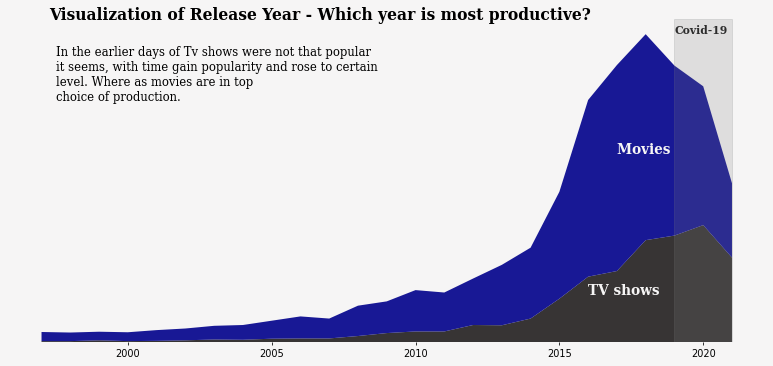

In [11]:
## visulaization

fig, ax = plt.subplots(figsize = (14,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'TV shows', 'Movies ']

# stackplot
ax.stackplot(rel_data.year[0:25], rel_data.Tv_count[0:25],rel_data.Movie_count[0:25],labels =labels, 
              colors = ['#221f1f','#00008B',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019, 1147, 'Covid-19', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2017, 700, '{}'.format(labels[1]), {'font':'serif', 'fontsize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2016, 175, '{}'.format(labels[0]),{'font':'serif', 'fontsize':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
ax.text(1997.25,1200, 'Visualization of Release Year - Which year is most productive?',
                      {'font':'serif', 'fontsize':'16', 'weight': 'bold','color': 'black'})
ax.text(1997.5,900, 'In the earlier days of Tv shows were not that popular \nit seems, with time gain popularity and rose to certain \nlevel. Where as movies are in top \nchoice of production. ',
                      {'font':'serif', 'fontsize':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>Release of content was happening from way back 1925, but here that data was truncated as it is out of scope of this anlayis. From the plot it is clear that entertainment industry mostly favoured movies till last decade, but things are changing and focus shifting towards shows as well. It is clear from the plot that covid did effected entertaiment industry significataly. Since past decade, both movies and tv shows gain popularity and most of the content is in the category of movies. 
   </p>
</div>

<a id = 'section9'></a>


<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 6 Netflix Content Added Year Analysis</h2>


In [12]:
TV = df[df['type'] == 'TV Show'].added_year.value_counts()
Movie = df[df['type'] == 'Movie'].added_year.value_counts()

# creating a dataframe

Tv_df = pd.DataFrame({'year': TV.index, 'Tv_count': TV.values})
Movie_df = pd.DataFrame({'year': Movie.index, 'Movie_count': Movie.values})

add_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
add_data.fillna('0', inplace = True)
add_data['Tv_count'] = add_data.Tv_count.astype('int64')
add_data = add_data.sort_values('year', ascending = False).reset_index(drop = True)

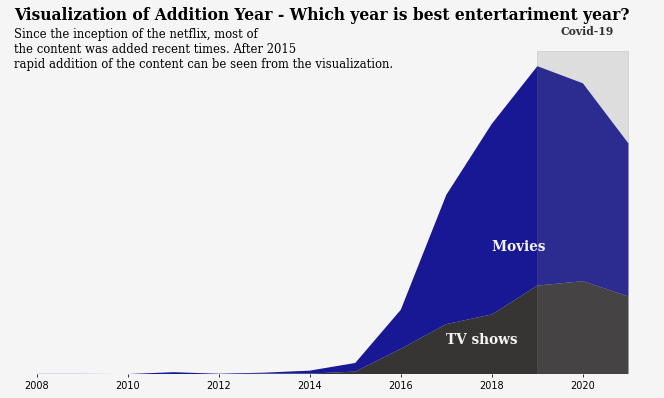

In [13]:
## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'TV shows', 'Movies ']

# stackplot
ax.stackplot(add_data.year[0:25], add_data.Tv_count[0:25],add_data.Movie_count[0:25],labels =labels, 
              colors = ['#221f1f','#00008B',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019.5, 2200, 'Covid-19', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2018, 800,'{}'.format(labels[1]), {'font':'serif', 'fontsize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2017, 200, '{}'.format(labels[0]),{'font':'serif', 'fontsize':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
ax.text(2007.5,2300, 'Visualization of Addition Year - Which year is best entertariment year?',
                      {'font':'serif', 'fontsize':'16', 'weight': 'bold','color': 'black'})
ax.text(2007.5,1990, 'Since the inception of the netflix, most of \nthe content was added recent times. After 2015 \nrapid addition of the content can be seen from the visualization. ',
                      {'font':'serif', 'fontsize':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()



<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p>Netflix started in 1997, but the content addition was very scarse and it is really internet that flipped the switch here. From 2015 most of the content was added to the platfrom and covid did effected this in a very bad way.
   </p>
</div>

<a id = 'section10'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 7 In Which Month Does Most of The Content Added To Platform?</h2>

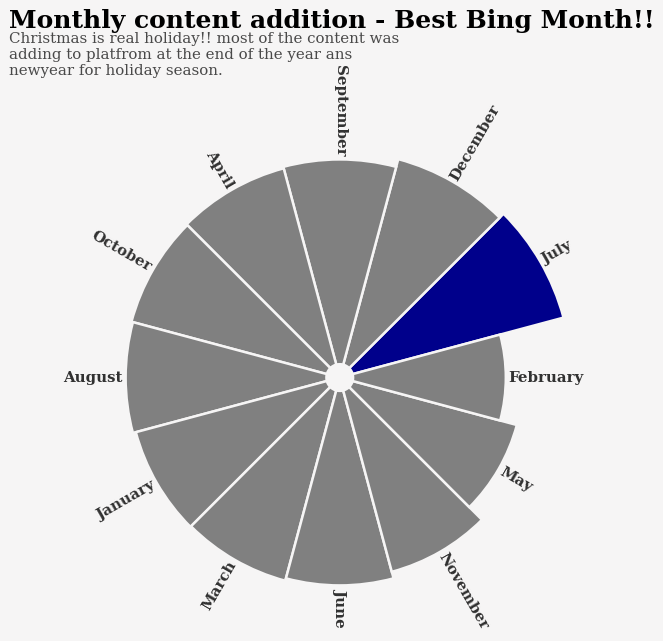

In [14]:
added_month = df['added_month'].value_counts()

# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


## labels
label_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
lab = added_month.index
labels = lab.map(label_map)

colors = ['#00008B', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10

# Compute max and min in the dataset
max = added_month.max()

slope = (max - lowerLimit) / max
heights = slope * added_month.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(added_month.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(added_month)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':12, 'weight':'bold','color':'black'},alpha = 0.8) 

fig.text(0.25,1.05,'Monthly content addition - Best Bing Month!!',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.text(0.25,0.975,'Christmas is real holiday!! most of the content was \nadding to platfrom at the end of the year ans \nnewyear for holiday season.',{'font':'serif', 'size':12,'color':'black'}, alpha = 0.7)
fig.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
    <p> From the plot above it is clear that in the month of january, december most of the content went online. It is good to observe that most of the content start available in holiday season, like march, just befro summer and like wise in december. 
   </p>
</div>

<a id = 'section11'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue; color : 'black'; text-align: center; border-radius: 100px 100px;"> 8. Netflix Content Country Analysis</h2>

In [15]:
country = df.country.value_counts()

coun = {}
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False))

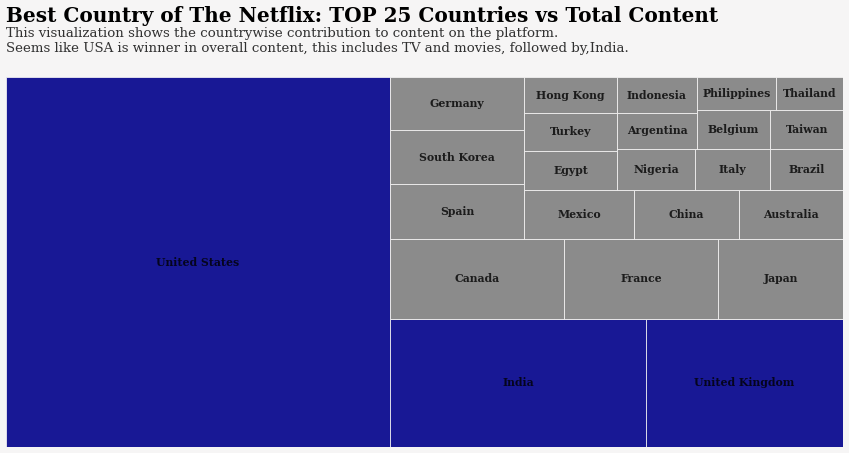

In [16]:
temp['color'] = temp['count'].apply(lambda x : '#00008B' if x > temp['count'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= temp['count'][0:24], label = temp['country'][0:24], ax = ax, color = temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Best Country of The Netflix: TOP 25 Countries vs Total Content',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,107, 'This visualization shows the countrywise contribution to content on the platform. \nSeems like USA is winner in overall content, this includes TV and movies, followed by,India.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

<a id = 'section13'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 9. TV Shows Preferred Countries</h2>

In [17]:
## TV show countrywise distribution

TV = df[df['type'] == 'TV Show']


TV_country = TV.country.value_counts()

TV_coun = {}
for idx, val in TV_country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in TV_coun.keys():
            d = {}
            d[i] = val + TV_coun[i]
            TV_coun.update(d)
        else:
            d = {i:val}
            TV_coun.update(d)

TV_nation, TV_count = [],[]
for idx, val in TV_coun.items():
    TV_nation.append(idx)
    TV_count.append(val)

TV_temp = (pd.DataFrame({'country':TV_nation, 'count': TV_count})
        .sort_values('count', ascending = False))
TV_temp['color'] = TV_temp['count'].apply(lambda x : '#00008B' if x > TV_temp['count'].values[3] else 'grey')


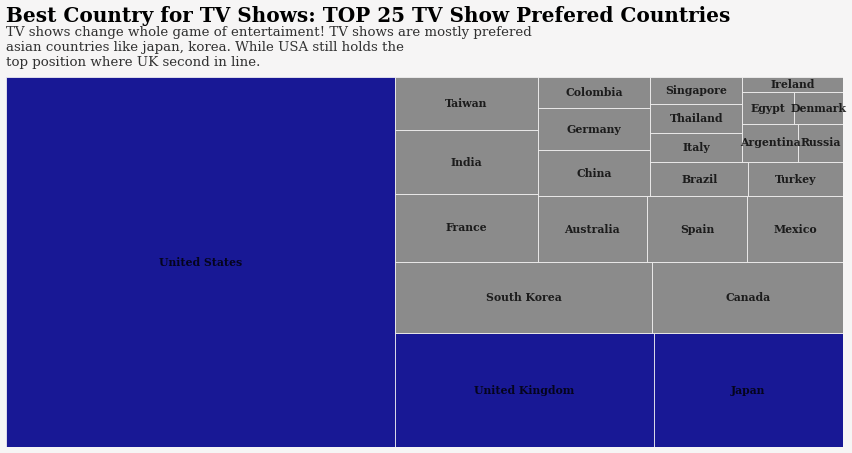

In [18]:
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= TV_temp['count'][0:24], label = TV_temp['country'][0:24], ax = ax, color = TV_temp['color'] ,  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Best Country for TV Shows: TOP 25 TV Show Prefered Countries ',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,103, 'TV shows change whole game of entertaiment! TV shows are mostly prefered \nasian countries like japan, korea. While USA still holds the \ntop position where UK second in line.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 10. Does Any Content Is International?</h2>

In [19]:
# content dataframe'i oluşturuluyor
content = df[['type', 'country']]

# 'country' sütunundaki her değeri string'e dönüştür ve split işlemiyle 'num_countries' sütununu oluştur
content['num_countries'] = content['country'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# 'International' sütununu oluştur
content['International'] = content['num_countries'].apply(lambda x: 1 if x > 1 else 0)

# 'dom' ve 'inter' verilerini oluştur
dom = content[content['International'] == 0]['type'].value_counts()
inter = content[content['International'] == 1]['type'].value_counts()

# Grup bazında sayım yapma
inter_t = inter.groupby('type').count()
dom_t = dom.groupby('type').count()



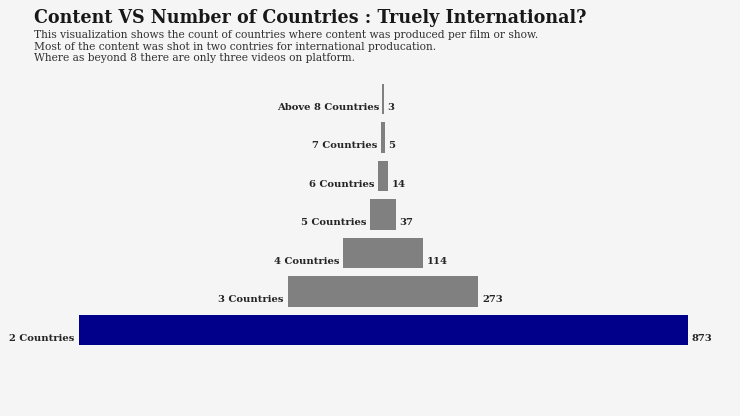

In [20]:
num_countries = content['num_countries'].value_counts()

fig, ax = plt.subplots(figsize = (10,5),dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

###bars left
color = ['#00008B','grey','grey','grey','grey','grey','grey']
ax.barh(y =  num_countries[1:-2].index  , width =num_countries[1:-2].values,  height = 0.8,color =color )
ax.barh(y =  8  , width = 3,  height = 0.8,color = 'grey')
#bars right
ax.barh(y =  num_countries[1:-2].index  , width = -num_countries[1:-2].values,  height = 0.8,color = color)
ax.barh(y =  8 , width = - 3,  height = 0.8,color = 'grey')


for i,j in num_countries.items():
    if (i >1 and i < 8):
        ax.text(j+10,i - 0.25, j, {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        ax.text(- (j+200),i -0.25,'{} Countries'.format(i), {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        
    if i == 8:
        ax.text(3 +10,i-0.25,3, {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        ax.text(- (3 +300),i-0.25,'Above 8 Countries', {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

#plt.title('Number of contries for international content count plot')
ax.set_xlim([-1000,1000])
ax.set_ylim([0,9])

ax.text(- 1000, 10, 'Content VS Number of Countries : Truely International?',{'font':'serif', 'size':14, 'color':'black','weight':'bold'}, alpha = 0.9)
ax.text(-1000,9, 'This visualization shows the count of countries where content was produced per film or show. \nMost of the content was shot in two contries for international producation. \nWhere as beyond 8 there are only three videos on platform.',
       {'font':'serif', 'size':8.5, 'color':'black'}, alpha = 0.8)
fig.show()

<a id = 'section16'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue; color : 'black'; text-align: center; border-radius: 100px 100px;"> 11. Netflix Content Genre Analysis</h2>



Netflix offer range of genre to subsribers, for comdeies to tragedy , documnetaries to talk shows, It would be fun to analyze this feature. One interesting thing to notice is that most of the content fells into to multiple genre so, we can visulaize single genre contet and multiple genre content as well.

With little data cleaing we find that there are total of only 42 genre on netflix, but all the content fell into multi genre,which makes a big mess to visulaize the data. 


In [21]:
## genere count 

def genere(what):
    if what == 'all':
        genere = df.listed_in.value_counts()
    else:
        genere = df[df['type'] == what].listed_in.value_counts()
    gener = {}
    
    for idx, val in genere.items():
        l = idx.split(',')
        for i in l:
            i = i.strip()
            if i in gener.keys():
                d = {}
                d[i] = val + gener[i]
                gener.update(d)
            else:
                d = {i:val}
                gener.update(d)
    theme, count = [],[]
    
    for idx, val in gener.items():
        theme.append(idx)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genere':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp
tv_genere = genere('TV Show')
mov_genere = genere('Movie')

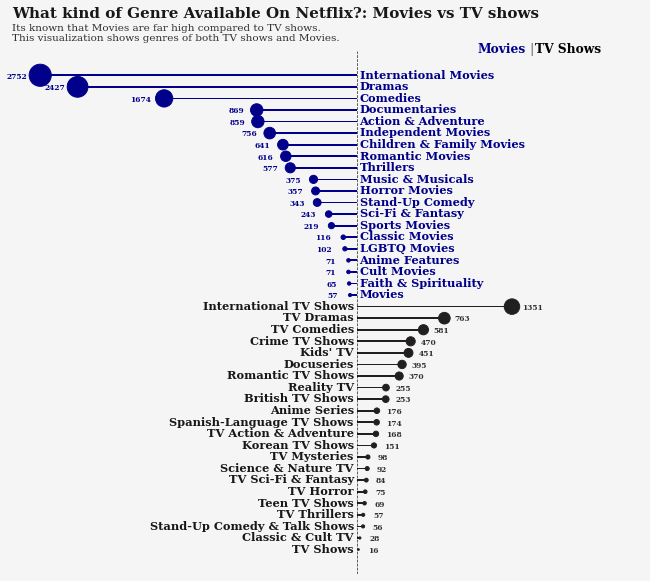

In [22]:
fig, ax  = plt.subplots(figsize = (12,10), dpi =68)

colors = ['#00008B']
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh( y = tv_genere['genere'], width = tv_genere['count'], height = 0.15, color = ['#221f1f'])
ax.scatter( y = tv_genere['genere'], x =  tv_genere['count'], s = tv_genere['count'] * 0.2, c = '#221f1f')

ax.barh( y = mov_genere['genere'], width = - mov_genere['count'], height = 0.15, color = ['#00008B'])
ax.scatter( y = mov_genere['genere'], x =  -mov_genere['count'], s=mov_genere['count']*0.2 , c = '#00008B')

ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':0.8, 'linestyle': '--', 'color' : 'black'}, alpha = 0.8)

tv_index = tv_genere['genere']
mov_index = mov_genere['genere']

tv_count = tv_genere['count']
mov_count = mov_genere['count']

for y_loc in range(0,22):
        ax.text(-25, y_loc - 0.25 , tv_index[y_loc],horizontalalignment= 'right',**{'font':'serif', 'size':12, 'weight':'bold', 'color':'black'}, alpha = 0.9)
        ax.text(tv_count[y_loc] + 85, y_loc - 0.25, tv_count[y_loc],horizontalalignment= 'left',**{'font':'serif', 'size':8, 'weight':'bold', 'color':'black'}, alpha = 0.8)
        
        
for y_loc in range(0,20):
        ax.text(25, 22+y_loc - 0.25, mov_index[y_loc],horizontalalignment = 'left',**{'font':'serif', 'size':12, 'weight':'bold', 'color':'#00008B'}, alpha =1)
        ax.text(-mov_count[y_loc] - 110,  22 + y_loc - 0.25 , mov_count[y_loc],horizontalalignment= 'right',**{'font':'serif', 'size':8, 'weight':'bold', 'color':'#00008B'}, alpha =1)
    
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
    
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_xlim([-3000,2500])

ax.text(-3000, 46, 'What kind of Genre Available On Netflix?: Movies vs TV shows',{'font':'serif', 'size':16, 'weight':'bold', 'color':'black'}, alpha = 0.9)
ax.text(-3000, 44, 'Its known that Movies are far high compared to TV shows. \nThis visualization shows genres of both TV shows and Movies.',{'font':'serif', 'size':11, 'color':'black'}, alpha = 0.8)

ax.text(1050, 43, 'Movies',{'font':'serif', 'size':13, 'color':'#00008B', 'weight':'bold'}, alpha = 1)
ax.text(1500, 43, '|',{'font':'serif', 'size':13, 'color':'grey','weight':'bold'}, alpha = 1)
ax.text(1550, 43, 'TV Shows',{'font':'serif', 'size':13, 'color':'black', 'weight':'bold'}, alpha = 1)

fig.show()


>    from above visulaization it is clear most of the content on platform is comidies and intenational films 

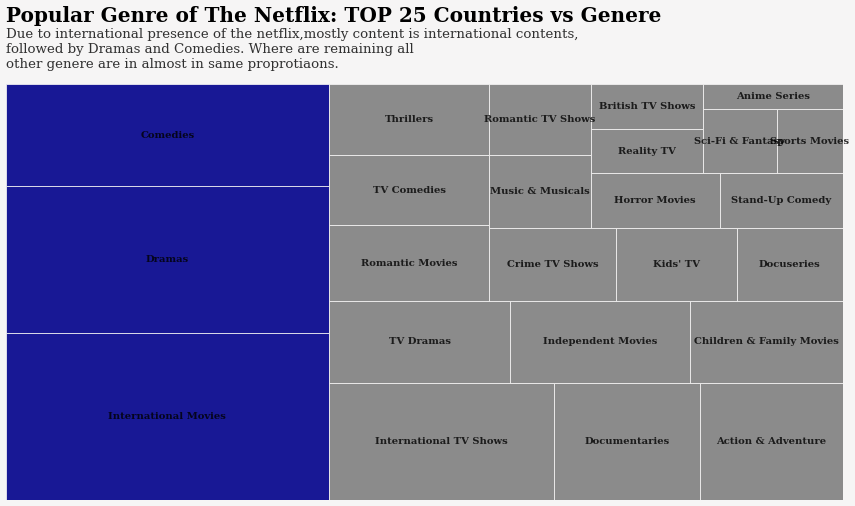

In [23]:
list_temp = genere('all')
list_temp = list_temp.sort_values(by = 'count', ascending = False).reset_index(drop = True)
list_temp['color'] = list_temp['count'].apply(lambda x : '#00008B' if x > list_temp['count'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,9), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= list_temp['count'][0:24], label = list_temp['genere'][0:24], ax = ax, color = list_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':12, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Popular Genre of The Netflix: TOP 25 Countries vs Genere',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,104, 'Due to international presence of the netflix,mostly content is international contents, \nfollowed by Dramas and Comedies. Where are remaining all \nother genere are in almost in same proprotiaons.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

In [24]:
listed_type = df[['type', 'listed_in']]

listed_type['num_genre'] = listed_type['listed_in'].apply(lambda x: len(x.split(',')))
listed_type['multi_genre'] = listed_type['num_genre'].apply(lambda x: 1 if x > 2 else 0)

listed_type.drop(columns = ['listed_in'], inplace = True)

tv_multi = listed_type[listed_type['type'] == 'TV Show']['multi_genre'].value_counts()
mv_multi = listed_type[listed_type['type'] == 'Movie']['multi_genre'].value_counts()

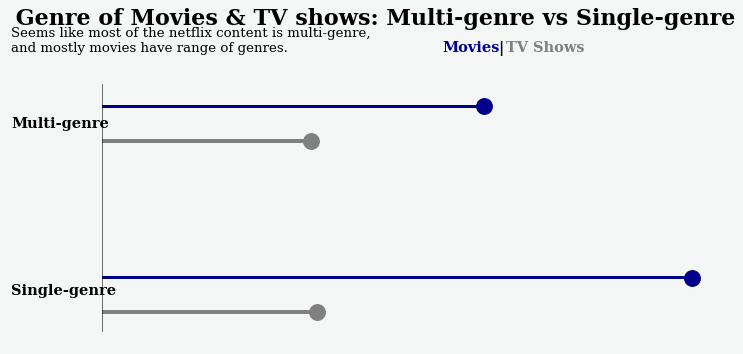

In [25]:

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

ax.barh( y = [2,2.25], width = tv_multi.values, height = 0.0055, color = 'grey' )
ax.barh(y = [2.05,2.3], width = mv_multi.values,height = 0.0052, color = colors )
ax.scatter(y = [2,2.25], x = tv_multi.values, s = 200, c = 'grey' )
ax.scatter(y = [2.05,2.3], x = mv_multi.values, s = 200, c = colors )

ax.axvline(ymin = 0.05, ymax = 0.85, x = 0, **{'linewidth':0.5},color = 'black',alpha = 1)



ax.text(-590,2.42, ' Genre of Movies & TV shows: Multi-genre vs Single-genre', {'font':'serif','weight':'bold','size':20})
ax.text(-570,2.38, 'Seems like most of the netflix content is multi-genre, \nand mostly movies have range of genres.', {'font':'serif','size':12})

ax.text(-570,2.27, 'Multi-genre', {'font':'serif','size':13, 'weight':'bold'})
ax.text(-570,2.025, 'Single-genre', {'font':'serif','size':13, 'weight':'bold'})



ax.text(2150, 2.38, 'Movies',{'font':'serif', 'size':13, 'color':'#00008B', 'weight':'bold'}, alpha = 1)
ax.text(2500, 2.38, '|',{'font':'serif', 'size':13, 'color':'black','weight':'bold'}, alpha = 1)
ax.text(2550, 2.38, 'TV Shows',{'font':'serif', 'size':13, 'color':'grey', 'weight':'bold'}, alpha = 1)

ax.set_ylim([1.95,2.4])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','bottom','top']:
    ax.spines[loc].set_visible(False)



fig.show()

<a id = 'section17'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 12. Netflix Content Duration Analysis</h2>

In [26]:
duration = df.duration.value_counts()

dur_TV_coun = {}
dur_Movi_coun = {}

for idx,val in duration.items():
    l = idx.split(' ')
    if l[1] == 'Season' or l[1] == 'Seasons':
        d = {idx.split(' ')[0] : val}
        dur_TV_coun.update(d)
    else:
        d = {idx.split(' ')[0] : val}
        dur_Movi_coun.update(d)


### tv duration count data
TV_duration, TV_count = [],[]
for idx, val in dur_TV_coun.items():
    TV_duration.append(idx)
    TV_count.append(val)

TV_duration_temp = (pd.DataFrame({'TV_duration': TV_duration, 'TV_count': TV_count})
        .sort_values('TV_count', ascending = False))

TV_duration_temp.reset_index(drop = True, inplace = True)
   
    
### movies duration count data

Movie_duration, Movie_count = [],[]
for idx, val in dur_Movi_coun.items():
    Movie_duration.append(idx)
    Movie_count.append(val)

Movie_duration_temp = (pd.DataFrame({'Movie_duration': Movie_duration, 'Movie_count': Movie_count})
        .sort_values('Movie_count', ascending = False))

Movie_duration_temp.reset_index(drop = True, inplace = True)



Movie_duration_temp['Movie_duration'] = Movie_duration_temp['Movie_duration'].astype('int64')
Movie_duration_temp['Movie_category'] = pd.cut(Movie_duration_temp['Movie_duration'], 
                                               bins = [0,30,60,90,120,150,180,210,240, 2000],
                                               labels = ['below 30 mins', 'between 30 and 60 mins',
                                                         'between 60 and 90 mins' ,
                                                         'between 90 and 120 mins',
                                                         'between 120 and 150 mins',
                                                         'between 150 and 180 mins',
                                                         'between 210 and 240 mins',
                                                         'between 240 and 1000 mins',
                                                         'above 1000 mins'])

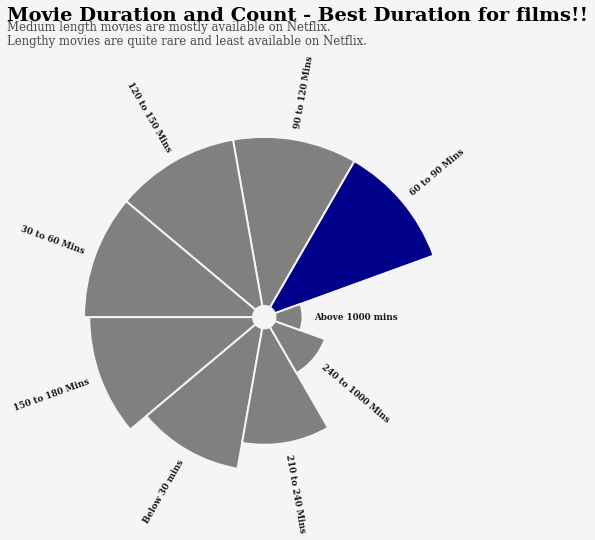

In [27]:
data  = Movie_duration_temp['Movie_category'].value_counts()


# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


labels = ['60 to 90 Mins', '90 to 120 Mins',
         '120 to 150 Mins', '30 to 60 Mins',
          '150 to 180 Mins', 'Below 30 mins',
          '210 to 240 Mins', '240 to 1000 Mins',
          'Above 1000 mins']

colors = ['#00008B', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 200
lowerLimit = 2
labelPadding = 2

# Compute max and min in the dataset
max = data.max()

slope = (max - lowerLimit) / max
heights = slope * data.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':9, 'weight':'bold','color':'black'},alpha = 0.9) 

fig.text(0.25,1.1,'Movie Duration and Count - Best Duration for films!!',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.text(0.25,1.05,'Medium length movies are mostly available on Netflix. \nLengthy movies are quite rare and least available on Netflix.',{'font':'serif', 'size':12,'color':'black'}, alpha = 0.7)
fig.show()

<a id = 'section20'></a>

<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: blue ; color : 'black'; text-align: center; border-radius: 100px 100px;"> 13. Netflix Content Cast Analysis</h2>

In [28]:
cast = df[['cast', 'type', 'title']]
cast_names = cast['cast']

names_dict = {}

for names in cast_names:
    if isinstance(names, str):  # Yalnızca string değerler üzerinde işlem yap
        names = names.split(',')
        for name in names:
            name = name.strip()  # Boşlukları temizle
            if name in names_dict.keys():
                names_dict[name] += 1
            else:
                names_dict[name] = 1

actor, roles = [], []
for key, value in names_dict.items():
    actor.append(key)
    roles.append(value)

cast_temp = (pd.DataFrame({'Actor': actor, 'Roles': roles})
             .sort_values('Roles', ascending=False))
cast_temp.reset_index(drop=True, inplace=True)

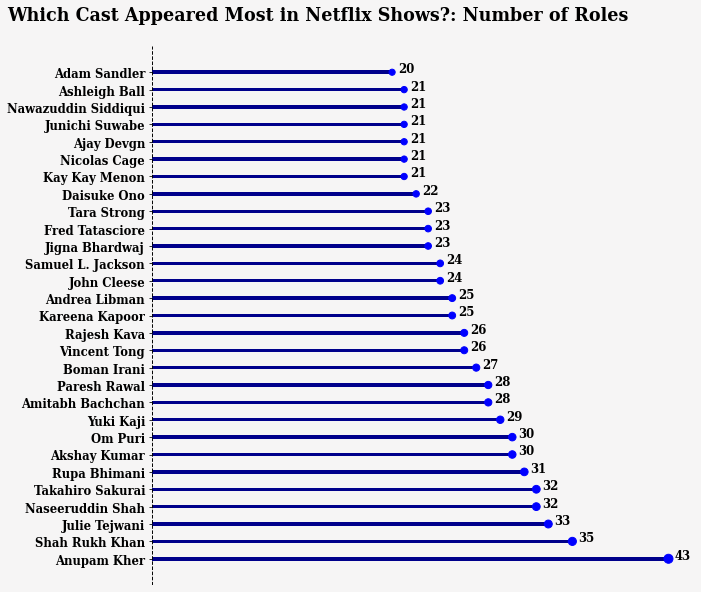

In [29]:
cast_temp = cast_temp.sort_values(by='Roles', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 10), dpi=70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y=cast_temp.Actor[1:30], width=cast_temp.Roles[1:30], height=0.2, color='#00008B')
ax.scatter(y=cast_temp.Actor[1:30], x=cast_temp.Roles[1:30], s=(cast_temp.Roles[1:30]) * 2, c='blue')  # `colors[0]` yerine 'blue' yazdım
ax.axvline(x=0, ymin=0, ymax=1, **{'linewidth': 1, 'linestyle': '--', 'color': 'black'})

# Adding the role numbers next to the bars
for i, j in zip(cast_temp.Roles[1:30], cast_temp.Actor[1:30]):
    ax.text(i + 0.5, j, i, {'font': 'serif', 'size': 12, 'weight': 'bold'})

# Set the y-axis labels correctly
ax.set_yticklabels(cast_temp.Actor[1:30], fontdict={'font': 'serif', 'size': 12, 'weight': 'bold'})

# Hide the x-axis ticks and labels
ax.set_xticklabels(labels=[])
ax.set_xticks(ticks=[])

# Add title
ax.text(-12, 31, 'Which Cast Appeared Most in Netflix Shows?: Number of Roles', {'font': 'serif', 'size': 18, 'weight': 'bold'})

# Remove the box frame
plt.box(None)

# Display the plot
fig.show()


<div class="alert alert-info alert-warning" style="background-color: white; color: blue;">
        
### 🎉 Thank you to everyone who reviewed this far! 🎉
- 🙏 Thank you so much for your support and interest! 🙏 I am grateful to each and every one of you for taking your valuable time to review this project. I hope the information I provided was useful and everything about the project was as you expected. 🚀

- 💡 If you have any questions or feedback, please feel free to let me know. 💡
- 
- 🔗 See you in the next project! 🔗</p>
</div>